In [13]:
##install.packages("spacetime")
library(ggplot2)
library(sqldf)
library(dplyr)
library(sp)
library(spacetime)
Sys.setlocale("LC_CTYPE", "thai")
options(encoding="UTF-8")

Warning message in Sys.setlocale("LC_CTYPE", "thai"):
“OS reports request to set locale to "thai" cannot be honored”

[1] ""

In [14]:
sensorlist<-read.csv("https://raw.githubusercontent.com/Maplub/Jupyter/master/sensorlist_with_height.csv",stringsAsFactors = FALSE)
sensorlist[sensorlist$sensorid=="CU-S00054",1]<-"CU-S0054"
sensorlist[sensorlist$sensorid=="CU-S00083",1]<-"CU-S0083"
sensorlist[sensorlist$sensorid=="CU-S00103",1]<-"CU-S0103"
sensorlist[sensorlist$sensorid=="CU-S00104",1]<-"CU-S0104"
sensorlist$sensorid <- as.factor(sensorlist$sensorid)

In [15]:
daily<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/PM2-5_2018_daily.csv")

In [16]:
colnames(daily)<-c('sensorid','date','pm25')
head(daily)

sensorid,date,pm25
CU-S0005,2018-02-07,45.86923
CU-S0006,2018-02-07,46.12795
CU-S0009,2018-02-07,46.32250
CU-S0010,2018-02-05,44.11757
CU-S0010,2018-02-06,44.97530
CU-S0010,2018-02-07,53.67967


In [17]:
daily[daily$sensorid=="CU-SOO94",1]<-"CU-S0094"

In [18]:
daily$timepos <- as.POSIXct(daily$date)

In [19]:
newdaily<-daily[daily$timepos>="2018-02-15" & daily$timepos<="2018-02-28",]
newdaily<- newdaily[order(newdaily$timepos, newdaily$sensorid),]

In [20]:
datefull<-seq(from=min(newdaily$timepos),to=max(newdaily$timepos), by="day")

In [21]:
sensor_newdaily<-sqldf('select distinct(sensorid) from newdaily')

In [22]:
fulldata<-merge(sensor_newdaily,datefull)
colnames(fulldata)[2]<-'timepos'

In [23]:
daily<-sqldf('select f.sensorid,f.timepos,n.pm25 from fulldata f LEFT JOIN newdaily n ON f.sensorid = n.sensorid AND f.timepos=n.timepos')

In [24]:
count_na<-aggregate(pm25 ~ sensorid, data=newdaily, function(x) {sum(is.na(x))}, na.action = NULL)
sensorFull<-count_na$sensorid[which(count_na$pm25<10)]
sensorFull

[1] CU-S0001 CU-S0002 CU-S0003 CU-S0004 CU-S0005 CU-S0006 CU-S0007 CU-S0008
 [9] CU-S0009 CU-S0010 CU-S0011 CU-S0013 CU-S0014 CU-S0015 CU-S0016 CU-S0017
[17] CU-S0018 CU-S0019 CU-S0020 CU-S0021 CU-S0022 CU-S0023 CU-S0024 CU-S0025
[25] CU-S0026 CU-S0027 CU-S0028 CU-S0029 CU-S0030 CU-S0032 CU-S0033 CU-S0034
[33] CU-S0035 CU-S0036 CU-S0037 CU-S0039 CU-S0040 CU-S0041 CU-S0042 CU-S0043
[41] CU-S0044 CU-S0045 CU-S0046 CU-S0047 CU-S0050 CU-S0051 CU-S0052 CU-S0053
[49] CU-S0054 CU-S0055 CU-S0056 CU-S0059 CU-S0060 CU-S0061 CU-S0064 CU-S0067
[57] CU-S0070 CU-S0071 CU-S0072 CU-S0073 CU-S0074 CU-S0075 CU-S0076 CU-S0078
[65] CU-S0079 CU-S0080 CU-S0081 CU-S0082 CU-S0083 CU-S0085 CU-S0086 CU-S0088
[73] CU-S0090 CU-S0091 CU-S0093 CU-S0094 CU-S0096 CU-S0097 CU-S0098 CU-S0100
[81] CU-S0101 CU-S0102 CU-S0103 CU-S0104
95 Levels: CU-S0001 CU-S0002 CU-S0003 CU-S0004 CU-S0005 CU-S0006 ... CU-S0203

In [25]:
daily<-subset(daily,sensorid %in% sensorFull)

In [26]:
monthly<-sqldf('select sensorid,avg(pm25) from daily group by sensorid')

In [27]:
colnames(monthly)[2]<-'pm25'

In [28]:
z_pm<-sqldf('select m.sensorid, s.Z, m.pm25 from sensorlist s, monthly m where s.sensorid=m.sensorid order by m.sensorid')

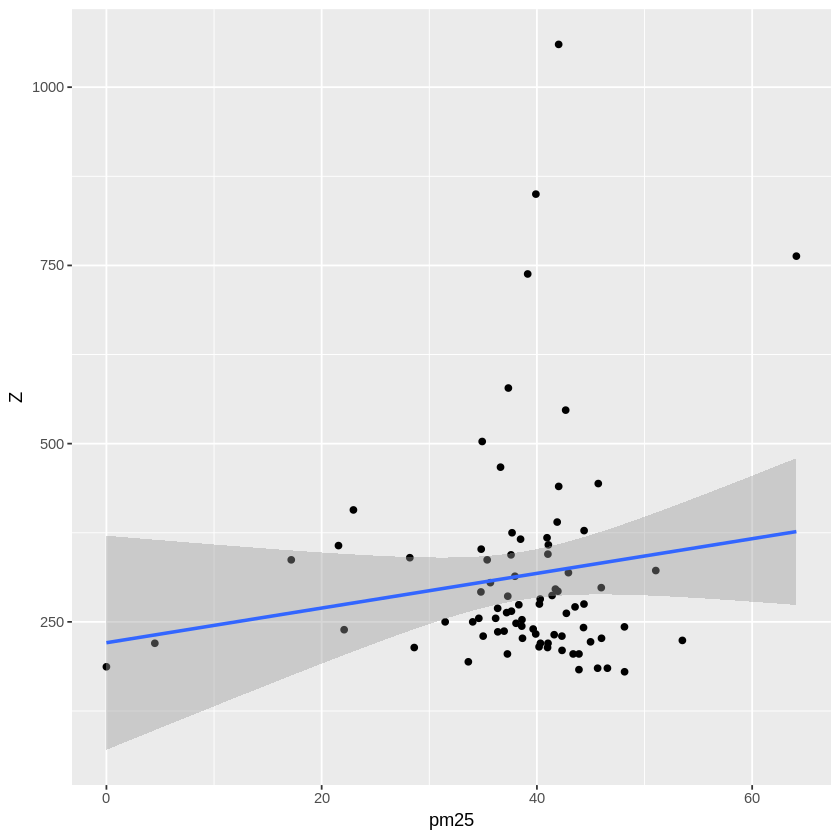

In [30]:
ggplot(z_pm,(aes(y=Z,x=pm25)))+geom_point()+geom_smooth(method='lm',formula=y~x)